# **Análise Exploratório dos Dados**

## **Importação das bibliotecas**

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
# Importando bibliotecas Pandas e Matplotlib.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter, LogFormatter

<br>

## **Funções**

In [176]:
# Função para plotar os gráficos de colunas menores.
def plotar_distribuicoes(dataframe, traducao_variaveis, graficos_por_linha=3, figsize=(18, 6), altura_subplot=6):
    variaveis = list(traducao_variaveis.keys())
    num_variaveis = len(variaveis)

    # Calcula o número total de linhas necessário.
    num_linhas = math.ceil(num_variaveis / graficos_por_linha)

    # Configura a figura e os subplots.
    fig, axs = plt.subplots(num_linhas, graficos_por_linha, figsize=(figsize[0], num_linhas * altura_subplot))
    fig.subplots_adjust(hspace=1.0)  # Ajusta o espaçamento vertical entre os subplots.

    # Converte axs para 1D, caso tenhamos apenas uma linha de subplots.
    axs = axs.flatten()

    # Loop sobre variáveis para criar os gráficos.
    for i, variavel in enumerate(variaveis):
        ax = axs[i]
        # Calcule a porcentagem de cada categoria na coluna.
        if variavel == 'CNT_CHILDREN':
            percentage_counts = dataframe[variavel].value_counts(normalize=True) * 100
            # Limita a exibição até o valor 4.
            percentage_counts = percentage_counts[percentage_counts.index <= 4]
        else:
            percentage_counts = dataframe[variavel].value_counts(normalize=True) * 100

        # Crie um gráfico de barras colorido usando seaborn.
        sns.barplot(x=percentage_counts.index, y=percentage_counts, palette="viridis", ax=ax)

        # Adicione rótulos e título ao gráfico.
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(f'{traducao_variaveis[variavel]}')

        # Adicione a porcentagem no topo das colunas.
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%',
                    ha='center', va='bottom')

        # Ajuste os rótulos do eixo x em um ângulo de 45 graus se o tipo for str e o comprimento for maior que 2 caracteres.
        if isinstance(percentage_counts.index[0], str) and len(percentage_counts.index[0]) > 2:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Remova subplots não utilizados (caso haja).
    for i in range(num_variaveis, len(axs)):
        fig.delaxes(axs[i])

    # Ajusta o layout da figura.
    plt.tight_layout()

    # Mostra a figura.
    plt.show()

# Exemplo de uso da função:
# traducao_variaveis = {
    # 'variable1': 'Variável 1',
    # 'variable2': 'Variável 2',
    # 'variable3': 'Variável 3',
    # Adicione mais traduções conforme necessário.
# }

# plotar_distribuicoes(df, traducao_variaveis, graficos_por_linha=3)

<br>

## **Leitura dos dados**

In [177]:
# Leitura da ABT 'applicatiion_train'.
abt_00 = pd.read_csv('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/0_bd_podbank/application_train.csv')
abt_00.shape

(215257, 172)

In [178]:
pd.set_option('display.max_columns', None)
abt_00.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50
0,247330,0,Cash loans,F,N,N,0,157500.0,706410.0,67072.5,679500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-14653,-2062,-8599.0,-2087,NaN,1,1,0,1,1,0,Private service staff,2.0,1,1,WEDNESDAY,13,0,0,0,0,0,0,Services,NaN,0.632424,0.220095,NaN,0.1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0702,Panel,No,1.0,0.0,1.0,0.0,-1254.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.381340,0.253773,0.205728,0.808261,0.917700,0.487698,0.955921,0.089342,0.519432,0.667806,0.333320,0.873508,0.293837,0.758751,0.972640,0.813237,0.398762,0.060109,0.432021,0.711729,0.455977,0.532977,0.615955,0.005083,0.465449,0.145924,0.026534,0.562217,0.380997,0.634713,0.322195,0.677877,0.518137,0.284267,0.896499,0.260938,0.030923,0.052023,0.969193,0.984378,0.824762,0.333516,0.293260,0.564878,0.115058,0.655605,0.415562,0.092643,0.723331,0.796523
1,425716,1,Cash loans,F,Y,Y,1,121500.0,545040.0,25407.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007114,-13995,-2246,-348.0,-172,12.0,1,1,1,1,1,0,Secretaries,3.0,2,2,MONDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.593456,0.695997,0.633032,0.6680,NaN,0.9856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6817,NaN,NaN,0.6807,NaN,0.9856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7102,NaN,NaN,0.6745,NaN,0.9856,NaN

In [179]:
'''
|1  |application_{train|test}.csv|SK_ID_CURR                  |ID do empréstimo na nossa amostra                                                                                                                                                                                                                                                  |null                                 |
|2  |application_{train|test}.csv|TARGET                      |Variável alvo (1 - cliente com dificuldades de pagamento: ele/ela teve atraso de pagamento por mais de X dias em pelo menos uma das primeiras Y parcelas do empréstimo em nossa amostra, 0 - todos os outros casos)                                                              |null                                 |
|5  |application_{train|test}.csv|NAME_CONTRACT_TYPE          |Identificação se o empréstimo é em dinheiro ou rotativo                                                                                                                                                                                                                            |null                                 |
|6  |application_{train|test}.csv|CODE_GENDER                 |Gênero do cliente                                                                                                                                                                                                                                                                  |null                                 |
|7  |application_{train|test}.csv|FLAG_OWN_CAR                |Sinalizador se o cliente possui um carro                                                                                                                                                                                                                                           |null                                 |
|8  |application_{train|test}.csv|FLAG_OWN_REALTY             |Sinalizador se o cliente possui uma casa ou apartamento                                                                                                                                                                                                                            |null                                 |
|9  |application_{train|test}.csv|CNT_CHILDREN                |Número de filhos que o cliente tem                                                                                                                                                                                                                                                 |null                                 |
|10 |application_{train|test}.csv|AMT_INCOME_TOTAL            |Renda do cliente                                                                                                                                                                                                                                                                   |null                                 |
|11 |application_{train|test}.csv|AMT_CREDIT                  |Valor do crédito do empréstimo                                                                                                                                                                                                                                                     |null                                 |
|12 |application_{train|test}.csv|AMT_ANNUITY                 |Anuidade do empréstimo                                                                                                                                                                                                                                                            |null                                 |
|13 |application_{train|test}.csv|AMT_GOODS_PRICE             |Para empréstimos ao consumidor, é o preço dos bens para os quais o empréstimo é concedido                                                                                                                                                                                          |null                                 |
|14 |application_{train|test}.csv|NAME_TYPE_SUITE             |Quem acompanhava o cliente quando ele solicitou o empréstimo                                                                                                                                                                                                                       |null                                 |
|15 |application_{train|test}.csv|NAME_INCOME_TYPE            |Tipo de renda dos clientes (empresário, trabalhador, licença maternidade, ...)                                                                                                                                                                                                     |null                                 |
|16 |application_{train|test}.csv|NAME_EDUCATION_TYPE         |Nível de educação mais alto que o cliente alcançou                                                                                                                                                                                                                                |null                                 |
|17 |application_{train|test}.csv|NAME_FAMILY_STATUS          |Estado civil do cliente                                                                                                                                                                                                                                                           |null                                 |
|18 |application_{train|test}.csv|NAME_HOUSING_TYPE           |Qual é a situação habitacional do cliente (alugando, morando com os pais, ...)                                                                                                                                                                                                      |null                                 |
|19 |application_{train|test}.csv|REGION_POPULATION_RELATIVE  |População normalizada da região onde o cliente mora (número mais alto significa que o cliente mora em uma região mais populosa)                                                                                                                                                    |normalizado                          |
|20 |application_{train|test}.csv|DAYS_BIRTH                  |Idade do cliente em dias no momento da aplicação                                                                                                                                                                                                                                  |apenas tempo relativo à aplicação     |
|21 |application_{train|test}.csv|DAYS_EMPLOYED               |Quantos dias antes da aplicação a pessoa começou o emprego atual                                                                                                                                                                                                                   |apenas tempo relativo à aplicação     |
|22 |application_{train|test}.csv|DAYS_REGISTRATION           |Quantos dias antes da aplicação o cliente mudou seu registro                                                                                                                                                                                                                        |apenas tempo relativo à aplicação     |
|23 |application_{train|test}.csv|DAYS_ID_PUBLISH             |Quantos dias antes da aplicação o cliente mudou o documento de identidade com o qual solicitou o empréstimo                                                                                                                                                                         |apenas tempo relativo à aplicação     |
|24 |application_{train|test}.csv|OWN_CAR_AGE                 |Idade do carro do cliente                                                                                                                                                                                                                                                         |null                                 |
|25 |application_{train|test}.csv|FLAG_MOBIL                  |O cliente forneceu telefone celular (1=SIM, 0=NÃO)                                                                                                                                                                                                                                |null                                 |
|26 |application_{train|test}.csv|FLAG_EMP_PHONE              |O cliente forneceu telefone comercial (1=SIM, 0=NÃO)                                                                                                                                                                                                                             |null                                 |
|27 |application_{train|test}.csv|FLAG_WORK_PHONE             |O cliente forneceu telefone residencial (1=SIM, 0=NÃO)                                                                                                                                                                                                                            |null                                 |
|28 |application_{train|test}.csv|FLAG_CONT_MOBILE            |O telefone celular do cliente era acessível (1=SIM, 0=NÃO)                                                                                                                                                                                                                        |null                                 |
|29 |application_{train|test}.csv|FLAG_PHONE                  |O cliente forneceu telefone residencial (1=SIM, 0=NÃO)                                                                                                                                                                                                                            |null                                 |
|30 |application_{train|test}.csv|FLAG_EMAIL                  |O cliente forneceu e-mail (1=SIM, 0=NÃO)                                                                                                                                                                                                                                          |null                                 |
|31 |application_{train|test}.csv|OCCUPATION_TYPE             |Qual tipo de ocupação o cliente tem                                                                                                                                                                                                                                               |null                                 |
|32 |application_{train|test}.csv|CNT_FAM_MEMBERS             |Quantos membros a família do cliente tem                                                                                                                                                                                                                                          |null                                 |
|33 |application_{train|test}.csv|REGION_RATING_CLIENT        |Nossa classificação da região onde o cliente mora (1,2,3)                                                                                                                                                                                                                         |null                                 |
|34 |application_{train|test}.csv|REGION_RATING_CLIENT_W_CITY |Nossa classificação da região onde o cliente mora, levando em consideração a cidade (1,2,3)                                                                                                                                                                                       |null                                 |
|35 |application_{train|test}.csv|WEEKDAY_APPR_PROCESS_START  |Em qual dia da semana o cliente solicitou o empréstimo                                                                                                                                                                                                                             |null                                 |
|36 |application_{train|test}.csv|HOUR_APPR_PROCESS_START     |Aproximadamente em que hora o cliente solicitou o empréstimo                                                                                                                                                                                                                        |arredondado                          |
|37 |application_{train|test}.csv|REG_REGION_NOT_LIVE_REGION  |Sinalizador se o endereço permanente do cliente não corresponde ao endereço de contato (1=diferente, 0=igual, no nível regional)                                                                                                                                                     |null                                 |
|38 |application_{train|test}.csv|REG_REGION_NOT_WORK_REGION  |Sinalizador se o endereço permanente do cliente não corresponde ao endereço de trabalho (1=diferente, 0=igual, no nível regional)                                                                                                                                                    |null                                 |
|39 |application_{train|test}.csv|LIVE_REGION_NOT_WORK_REGION |Sinalizador se o endereço de contato do cliente não corresponde ao endereço de trabalho (1=diferente, 0=igual, no nível regional)                                                                                                                                                   |null                                 |
|40 |application_{train|test}.csv|REG_CITY_NOT_LIVE_CITY      |Sinalizador se o endereço permanente do cliente não corresponde ao endereço de contato (1=diferente, 0=igual, no nível da cidade)                                                                                                                                                   |null                                 |
|41 |application_{train|test}.csv|REG_CITY_NOT_WORK_CITY      |Sinalizador se o endereço permanente do cliente não corresponde ao endereço de trabalho (1=diferente, 0=igual, no nível da cidade)                                                                                                                                                   |null                                 |
|42 |application_{train|test}.csv|LIVE_CITY_NOT_WORK_CITY     |Sinalizador se o endereço de contato do cliente não corresponde ao endereço de trabalho (1=diferente, 0=igual, no nível da cidade)                                                                                                                                                 |null                                 |
|43 |application_{train|test}.csv|ORGANIZATION_TYPE           |Tipo de organização onde o cliente trabalha                                                                                                                                                                                                                                       |null                                 |
|44 |application_{train|test}.csv|EXT_SOURCE_1                |Pontuação normalizada de fonte de dados externa                                                                                                                                                                                                                                   |normalizado                          |
|45 |application_{train|test}.csv|EXT_SOURCE_2                |Pontuação normalizada de fonte de dados externa                                                                                                                                                                                                                                   |normalizado                          |
|46 |application_{train|test}.csv|EXT_SOURCE_3                |Pontuação normalizada de fonte de dados externa                                                                                                                                                                                                                                   |normalizado                          |
|47 |application_{train|test}.csv|APARTMENTS_AVG              |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|48 |application_{train|test}.csv|BASEMENTAREA_AVG            |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|49 |application_{train|test}.csv|YEARS_BEGINEXPLUATATION_AVG |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|50 |application_{train|test}.csv|YEARS_BUILD_AVG             |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|51 |application_{train|test}.csv|COMMONAREA_AVG              |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|52 |application_{train|test}.csv|ELEVATORS_AVG               |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|53 |application_{train|test}.csv|ENTRANCES_AVG               |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|54 |application_{train|test}.csv|FLOORSMAX_AVG               |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|55 |application_{train|test}.csv|FLOORSMIN_AVG               |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|56 |application_{train|test}.csv|LANDAREA_AVG                |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|57 |application_{train|test}.csv|LIVINGAPARTMENTS_AVG        |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|58 |application_{train|test}.csv|LIVINGAREA_AVG              |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|59 |application_{train|test}.csv|NONLIVINGAPARTMENTS_AVG     |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|60 |application_{train|test}.csv|NONLIVINGAREA_AVG           |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|61 |application_{train|test}.csv|APARTMENTS_MODE             |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|62 |application_{train|test}.csv|BASEMENTAREA_MODE           |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|63 |application_{train|test}.csv|YEARS_BEGINEXPLUATATION_MODE|Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|64 |application_{train|test}.csv|YEARS_BUILD_MODE            |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|65 |application_{train|test}.csv|COMMONAREA_MODE             |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|66 |application_{train|test}.csv|ELEVATORS_MODE              |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|67 |application_{train|test}.csv|ENTRANCES_MODE              |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|68 |application_{train|test}.csv|FLOORSMAX_MODE              |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|69 |application_{train|test}.csv|FLOORSMIN_MODE              |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|70 |application_{train|test}.csv|LANDAREA_MODE               |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|71 |application_{train|test}.csv|LIVINGAPARTMENTS_MODE       |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|72 |application_{train|test}.csv|LIVINGAREA_MODE             |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|73 |application_{train|test}.csv|NONLIVINGAPARTMENTS_MODE    |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|74 |application_{train|test}.csv|NONLIVINGAREA_MODE          |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|75 |application_{train|test}.csv|APARTMENTS_MEDI             |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|76 |application_{train|test}.csv|BASEMENTAREA_MEDI           |Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|77 |application_{train|test}.csv|YEARS_BEGINEXPLUATATION_MEDI|Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares  |normalizado                          |
|78 |application_{train|test}.csv|YEARS_BUILD_MEDI            |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|79 |application_{train|test}.csv|COMMONAREA_MEDI             |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|80 |application_{train|test}.csv|ELEVATORS_MEDI              |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|81 |application_{train|test}.csv|ENTRANCES_MEDI              |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|82 |application_{train|test}.csv|FLOORSMAX_MEDI              |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|83 |application_{train|test}.csv|FLOORSMIN_MEDI              |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|84 |application_{train|test}.csv|LANDAREA_MEDI               |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|85 |application_{train|test}.csv|LIVINGAPARTMENTS_MEDI       |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|86 |application_{train|test}.csv|LIVINGAREA_MEDI             |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|87 |application_{train|test}.csv|NONLIVINGAPARTMENTS_MEDI    |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|88 |application_{train|test}.csv|NONLIVINGAREA_MEDI          |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|89 |application_{train|test}.csv|FONDKAPREMONT_MODE          |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|90 |application_{train|test}.csv|HOUSETYPE_MODE              |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|91 |application_{train|test}.csv|TOTALAREA_MODE              |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|92 |application_{train|test}.csv|WALLSMATERIAL_MODE          |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|93 |application_{train|test}.csv|EMERGENCYSTATE_MODE         |Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares|normalizado                           |
|94 |application_{train|test}.csv|OBS_30_CNT_SOCIAL_CIRCLE    |Quantas observações do círculo social do cliente são observáveis com 30 DPD (dias de atraso)                                                                                                                                                                                        |null                                 |
|95 |application_{train|test}.csv|DEF_30_CNT_SOCIAL_CIRCLE    |Quantas observações do círculo social do cliente entraram em default em 30 DPD (dias de atraso)                                                                                                                                                                                     |null                                 |
|96 |application_{train|test}.csv|OBS_60_CNT_SOCIAL_CIRCLE    |Quantas observações do círculo social do cliente são observáveis com 60 DPD (dias de atraso)                                                                                                                                                                                        |null                                 |
|97 |application_{train|test}.csv|DEF_60_CNT_SOCIAL_CIRCLE    |Quantas observações do círculo social do cliente entraram em default em 60 DPD (dias de atraso)                                                                                                                                                                                     |null                                 |
|98 |application_{train|test}.csv|DAYS_LAST_PHONE_CHANGE      |Quantos dias antes da aplicação o cliente mudou de telefone                                                                                                                                                                                                                        |null                                 |
|99 |application_{train|test}.csv|FLAG_DOCUMENT_2             |O cliente forneceu o documento 2                                                                                                                                                                                                                                                   |null                                 |
|100|application_{train|test}.csv|FLAG_DOCUMENT_3             |O cliente forneceu o documento 3                                                                                                                                                                                                                                                   |null                                 |
|101|application_{train|test}.csv|FLAG_DOCUMENT_4             |O cliente forneceu o documento 4                                                                                                                                                                                                                                                   |null                                 |
|102|application_{train|test}.csv|FLAG_DOCUMENT_5             |O cliente forneceu o documento 5                                                                                                                                                                                                                                                   |null                                 |
|103|application_{train|test}.csv|FLAG_DOCUMENT_6             |O cliente forneceu o documento 6                                                                                                                                                                                                                                                   |null                                 |
|104|application_{train|test}.csv|FLAG_DOCUMENT_7             |O cliente forneceu o documento 7                                                                                                                                                                                                                                                   |null                                 |
|105|application_{train|test}.csv|FLAG_DOCUMENT_8             |O cliente forneceu o documento 8                                                                                                                                                                                                                                                   |null                                 |
|106|application_{train|test}.csv|FLAG_DOCUMENT_9             |O cliente forneceu o documento 9                                                                                                                                                                                                                                                   |null                                 |
|107|application_{train|test}.csv|FLAG_DOCUMENT_10            |O cliente forneceu o documento 10                                                                                                                                                                                                                                                  |null                                 |
|108|application_{train|test}.csv|FLAG_DOCUMENT_11            |O cliente forneceu o documento 11                                                                                                                                                                                                                                                  |null                                 |
|109|application_{train|test}.csv|FLAG_DOCUMENT_12            |O cliente forneceu o documento 12                                                                                                                                                                                                                                                  |null                                 |
|110|application_{train|test}.csv|FLAG_DOCUMENT_13            |O cliente forneceu o documento 13                                                                                                                                                                                                                                                  |null                                 |
|111|application_{train|test}.csv|FLAG_DOCUMENT_14            |O cliente forneceu o documento 14                                                                                                                                                                                                                                                  |null                                 |
|112|application_{train|test}.csv|FLAG_DOCUMENT_15            |O cliente forneceu o documento 15                                                                                                                                                                                                                                                  |null                                 |
|113|application_{train|test}.csv|FLAG_DOCUMENT_16            |O cliente forneceu o documento 16                                                                                                                                                                                                                                                  |null                                 |
|114|application_{train|test}.csv|FLAG_DOCUMENT_17            |O cliente forneceu o documento 17                                                                                                                                                                                                                                                  |null                                 |
|115|application_{train|test}.csv|FLAG_DOCUMENT_18            |O cliente forneceu o documento 18                                                                                                                                                                                                                                                  |null                                 |
|116|application_{train|test}.csv|FLAG_DOCUMENT_19            |O cliente forneceu o documento 19                                                                                                                                                                                                                                                  |null                                 |
|117|application_{train|test}.csv|FLAG_DOCUMENT_20            |O cliente forneceu o documento 20                                                                                                                                                                                                                                                  |null                                 |
|118|application_{train|test}.csv|FLAG_DOCUMENT_21            |O cliente forneceu o documento 21                                                                                                                                                                                                                                                  |null                                 |
|119|application_{train|test}.csv|AMT_REQ_CREDIT_BUREAU_HOUR  |Número de consultas ao Credit Bureau sobre o cliente uma hora antes da aplicação                                                                                                                                                                                                    |null                                 |
|120|application_{train|test}.csv|AMT_REQ_CREDIT_BUREAU_DAY   |Número de consultas ao Credit Bureau sobre o cliente um dia antes da aplicação (excluindo uma hora antes da aplicação)                                                                                                                                                            |null                                 |
|121|application_{train|test}.csv|AMT_REQ_CREDIT_BUREAU_WEEK  |Número de consultas ao Credit Bureau sobre o cliente uma semana antes da aplicação (excluindo um dia antes da aplicação)                                                                                                                                                            |null                                 |
|122|application_{train|test}.csv|AMT_REQ_CREDIT_BUREAU_MON   |Número de consultas ao Credit Bureau sobre o cliente um mês antes da aplicação (excluindo uma semana antes da aplicação)                                                                                                                                                          |null                                 |
|123|application_{train|test}.csv|AMT_REQ_CREDIT_BUREAU_QRT   |Número de consultas ao Credit Bureau sobre o cliente 3 meses antes da aplicação (excluindo um mês antes da aplicação)                                                                                                                                                           |null                                 |
|124|application_{train|test}.csv|AMT_REQ_CREDIT_BUREAU_YEAR  |Número de consultas ao Credit Bureau sobre o cliente um ano antes (excluindo os últimos 3 meses antes da aplicação)                                                                                                                                                                 |null
'''

'\n|1  |application_{train|test}.csv|SK_ID_CURR                  |ID do empréstimo na nossa amostra                                                                                                                                                                                                                                                  |null                                 |\n|2  |application_{train|test}.csv|TARGET                      |Variável alvo (1 - cliente com dificuldades de pagamento: ele/ela teve atraso de pagamento por mais de X dias em pelo menos uma das primeiras Y parcelas do empréstimo em nossa amostra, 0 - todos os outros casos)                                                              |null                                 |\n|5  |application_{train|test}.csv|NAME_CONTRACT_TYPE          |Identificação se o empréstimo é em dinheiro ou rotativo                                                                                                                           

In [180]:
abt_00.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50
count,215257.000000,215257.000000,215257.000000,2.152570e+05,2.152570e+05,215249.000000,2.150580e+05,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,73421.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215256.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,94008.000000,2.147840e+05,172420.000000,105957.000000,89273.000000,110268.000000,72118.000000,64880.000000,100536.000000,106839.000000,108075.000000,69261.000000,87450.000000,68178.000000,107173.000000,65850.000000,96369.000000,105957.000000,89273.000000,110268.000000,72118.000000,64880.000000,100536.000000,106839.000000,108075.000000,69261.000000,87450.000000,68178.000000,107173.000000,65850.000000,96369.000000,105957.000000,89273.000000,110268.000000,72118.000000,64880.000000,100536.000000,106839.000000,108075.000000,69261.000000,87450.000000,68178.000000,107173.000000,65850.000000,96369.000000,111352.000000,214553.000000,214553.000000,214553.000000,214553.000000,215256.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,186107.000000,186107.000000,186107.000000,186107.000000,186107.000000,186107.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,2.152570e+05,215257.000000,215257.000000,2.152570e+05,215257.000000,2.152570e+05,215257.000000,215257.000000,215257.000000,2.152570e+05,2.152570e+05,2.152570e+05,2.15257

In [181]:
df = abt_00

<br>

## **Gráficos de Distribuição**

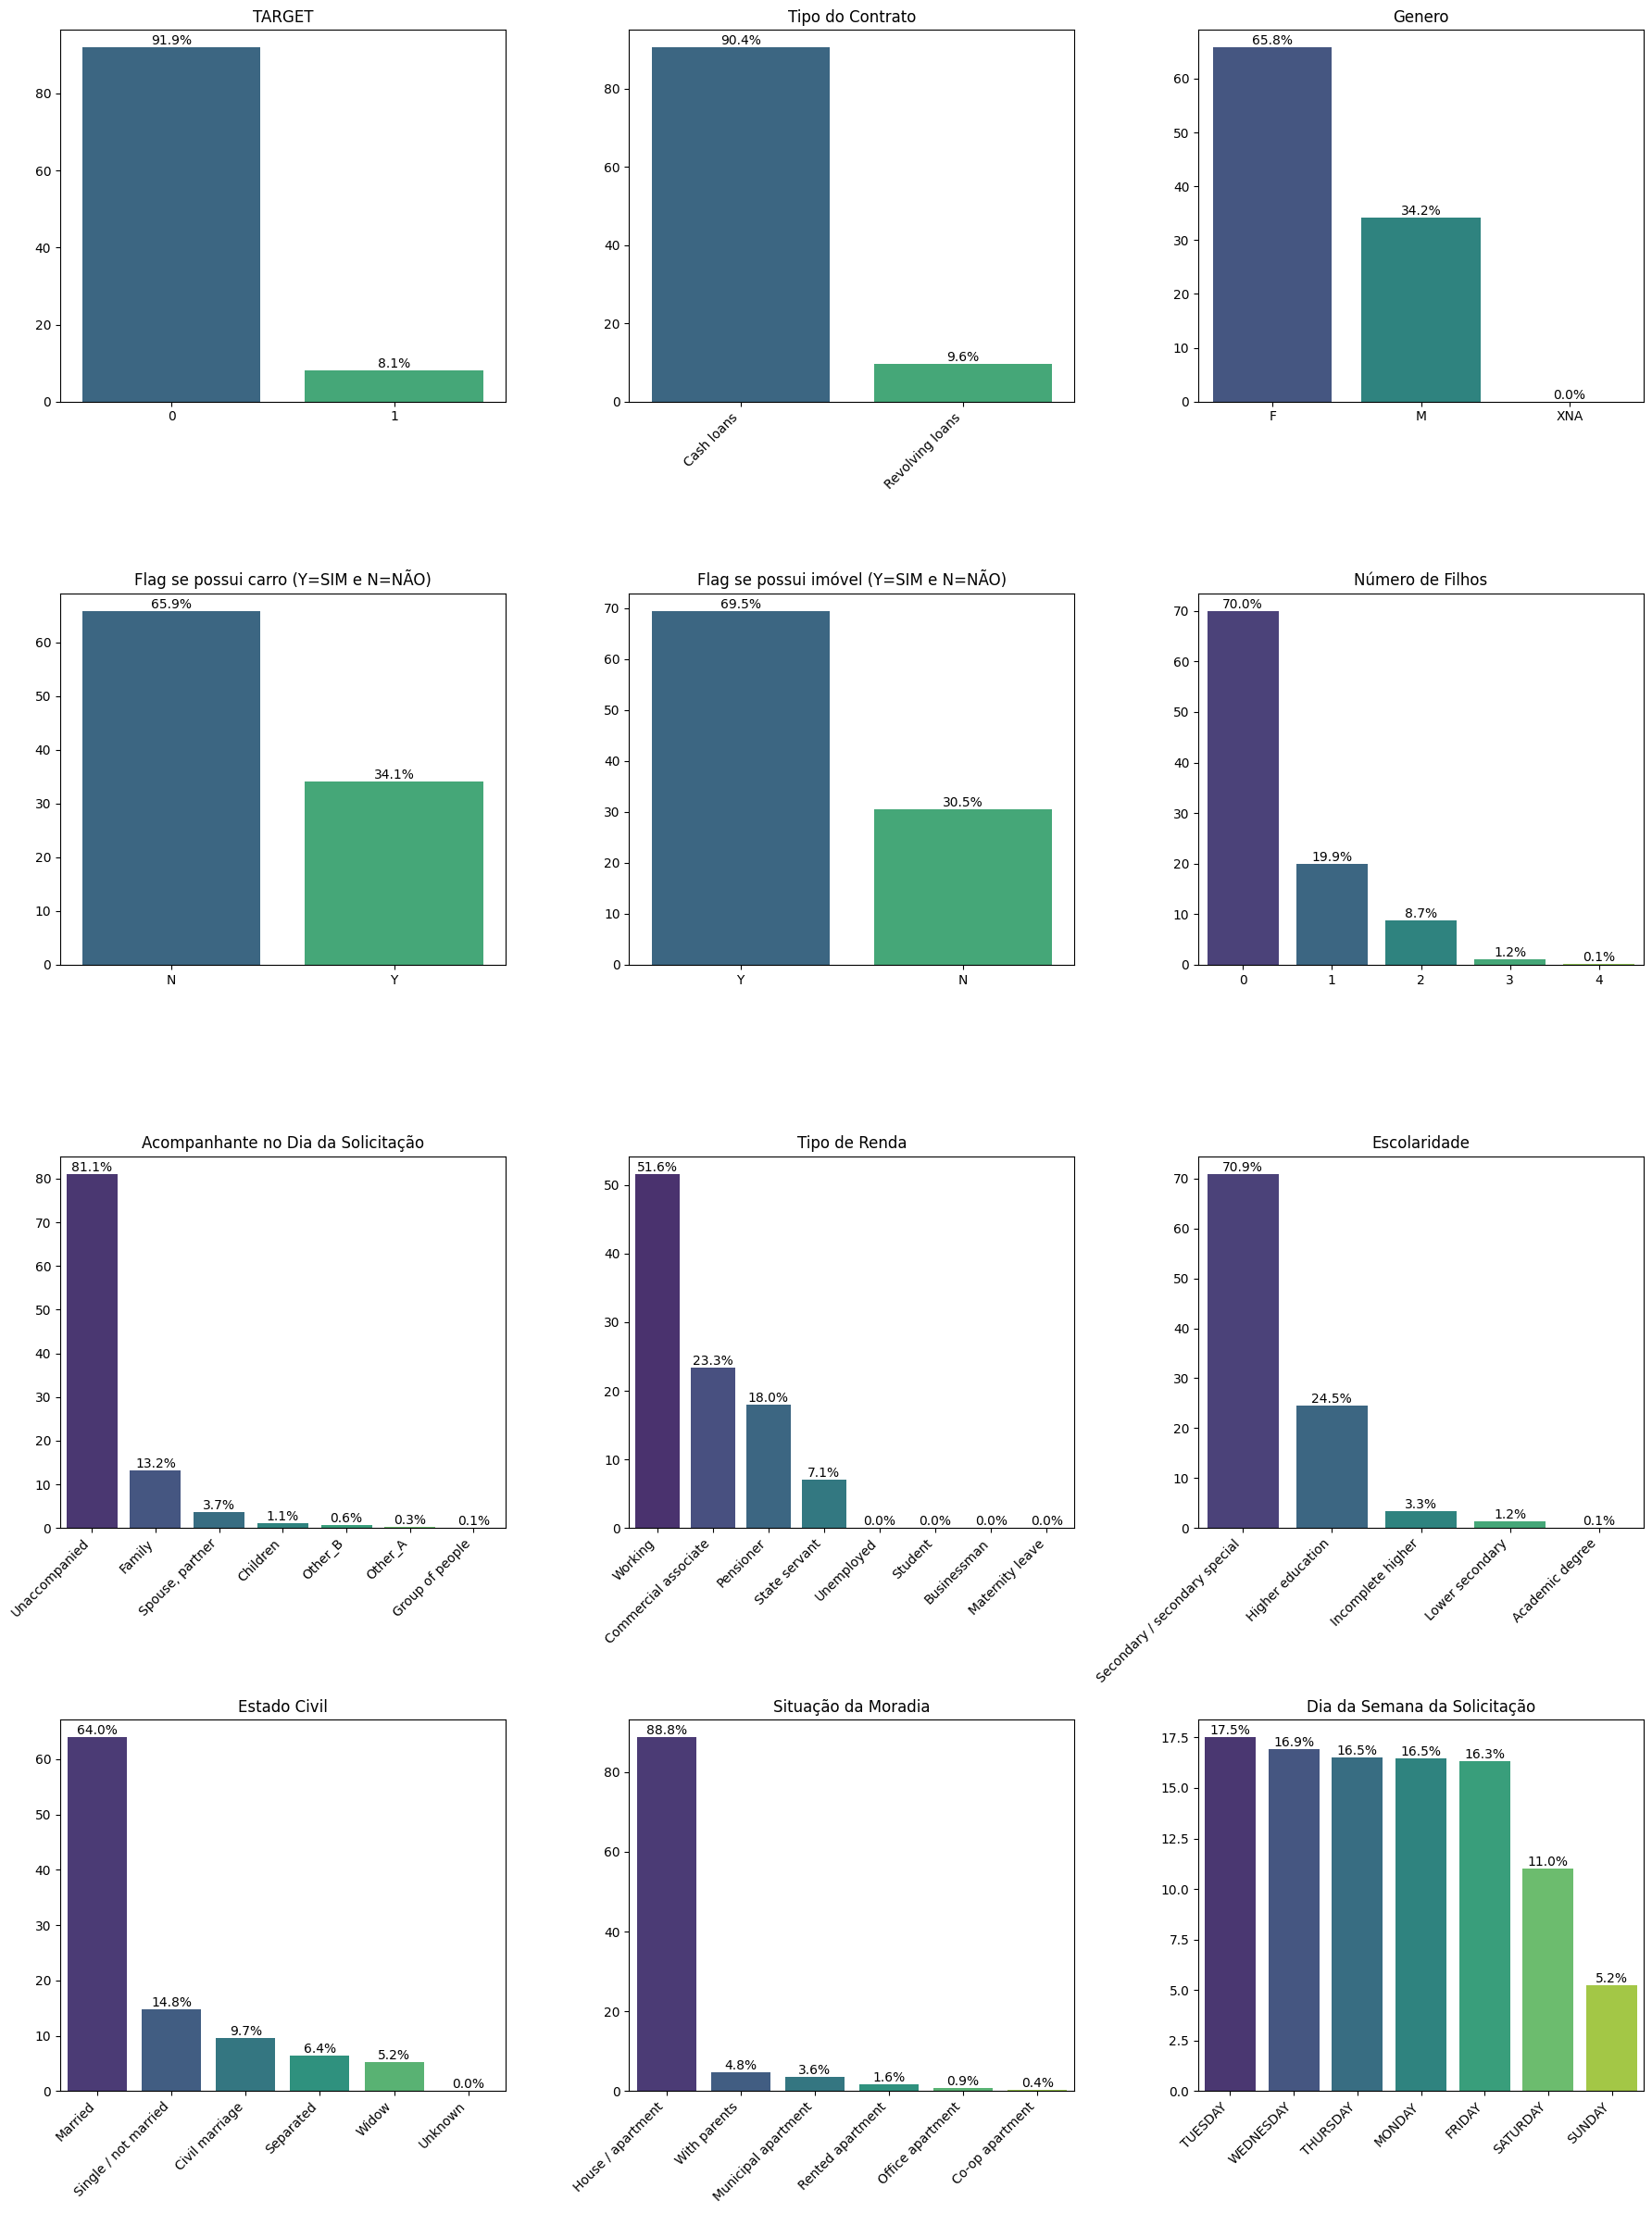

In [182]:
df = abt_00

traducao_variaveis = {
    'TARGET': 'TARGET',
    'NAME_CONTRACT_TYPE': 'Tipo do Contrato',
    'CODE_GENDER': 'Genero',
    'FLAG_OWN_CAR': 'Flag se possui carro (Y=SIM e N=NÃO)',
    'FLAG_OWN_REALTY': 'Flag se possui imóvel (Y=SIM e N=NÃO)',
    'CNT_CHILDREN': 'Número de Filhos',
    'NAME_TYPE_SUITE': 'Acompanhante no Dia da Solicitação',
    'NAME_INCOME_TYPE': 'Tipo de Renda',
    'NAME_EDUCATION_TYPE': 'Escolaridade',
    'NAME_FAMILY_STATUS': 'Estado Civil',
    'NAME_HOUSING_TYPE': 'Situação da Moradia',
    'WEEKDAY_APPR_PROCESS_START': 'Dia da Semana da Solicitação'
}

plotar_distribuicoes(df, traducao_variaveis, graficos_por_linha=3)

<br>

**Distribuição da Idade**

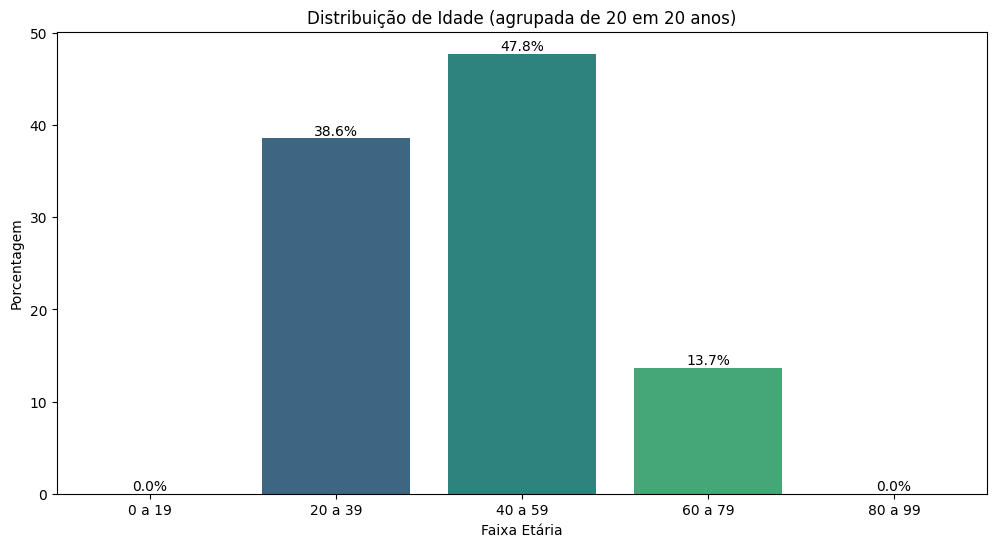

In [197]:
df = abt_00

# Converta a coluna DAYS_BIRTH para anos.
df['AGE'] = df['DAYS_BIRTH'] // 365 * -1

# Defina os intervalos para agrupar as idades (0-20, 21-40, 41-60, ...).
bins = list(range(0, 120, 20))

# Crie uma coluna 'AGE_GROUP' para categorizar as idades.
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, right=False)

# Defina as labels para cada faixa etária.
labels = [f'{i} a {i+19}' for i in range(0, 100, 20)]

# Calcule a porcentagem de cada categoria na coluna 'AGE_GROUP'.
percentage_counts = df['AGE_GROUP'].value_counts(normalize=True, sort=False) * 100

# Ordene as labels de acordo com os bins.
labels = [label for _, label in sorted(zip(bins[:-1], labels))]

# Crie um gráfico de barras colorido usando seaborn.
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=labels, y=percentage_counts, palette="viridis")

# Adicione rótulos e título ao gráfico.
plt.xlabel('Faixa Etária')
plt.ylabel('Porcentagem')
plt.title('Distribuição de Idade (agrupada de 20 em 20 anos)')

# Adicione a porcentagem no topo das colunas.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%',
            ha='center', va='bottom')

# Mostre o gráfico.
plt.show()

<br>

**Distribuição da Ocupação**

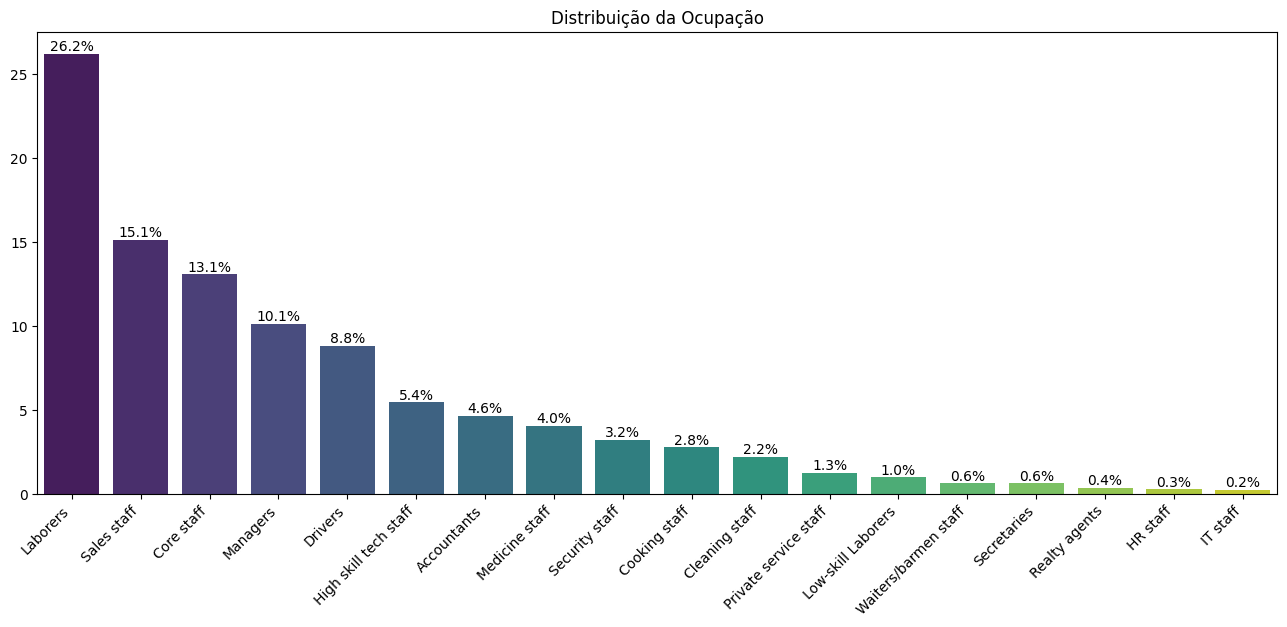

In [184]:
df = abt_00

# Calcule a porcentagem de cada categoria na coluna 'OCCUPATION_TYPE'.
percentage_counts = df['OCCUPATION_TYPE'].value_counts(normalize=True) * 100

# Crie um gráfico de barras colorido usando seaborn.
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=percentage_counts.index, y=percentage_counts, palette="viridis")

# Adicione rótulos e título ao gráfico.
plt.xlabel('')
plt.ylabel('')
plt.title('Distribuição da Ocupação')

# Adicione a porcentagem no topo das colunas.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%',
            ha='center', va='bottom')

# Rotacione os rótulos do eixo x em 45 graus.
plt.xticks(rotation=45, ha='right')

# Mostre o gráfico.
plt.show()

<br>

**Distribuição da Profissão**

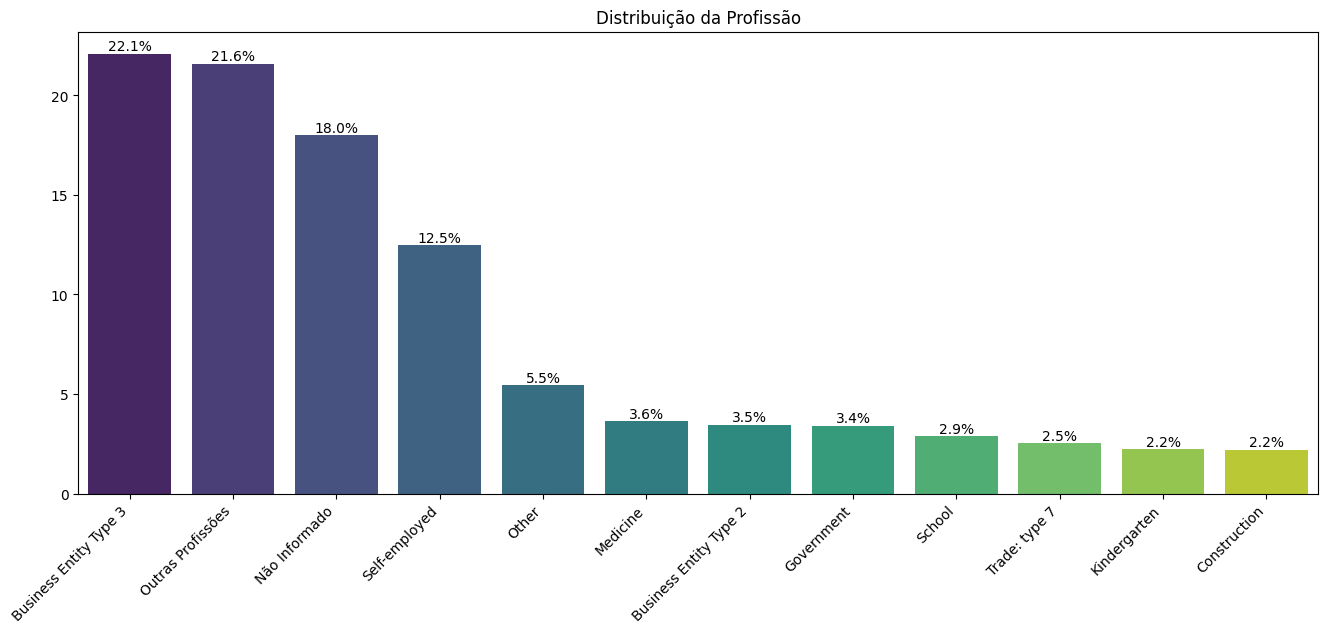

In [185]:
df = abt_00

# Substituir 'XNA' por 'Não Informado'.
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace('XNA', 'Não Informado')

# Calcular a porcentagem de cada categoria na coluna 'ORGANIZATION_TYPE'.
percentage_counts = df['ORGANIZATION_TYPE'].value_counts(normalize=True) * 100

# Filtrar categorias com menos de 2% e agrupar em 'Outras Profissões'.
threshold = 2
main_categories = percentage_counts[percentage_counts >= threshold]
other_categories = percentage_counts[percentage_counts < threshold]
other_percentage = other_categories.sum()

# Criar uma nova série com as categorias principais e 'Outras Profissões', ordenadas da maior para a menor.
new_percentage_counts = pd.concat([main_categories, pd.Series({ 'Outras Profissões': other_percentage })])
new_percentage_counts = new_percentage_counts.sort_values(ascending=False)

# Criar um gráfico de barras colorido usando seaborn.
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=new_percentage_counts.index, y=new_percentage_counts, palette="viridis")

# Adicionar rótulos e título ao gráfico.
plt.xlabel('')
plt.ylabel('')
plt.title('Distribuição da Profissão')

# Adicionar a porcentagem no topo das colunas.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%',
            ha='center', va='bottom')

# Rotacionar os rótulos do eixo x em 45 graus.
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico.
plt.show()

<br>

<br>

## **Análise da Renda do Cliente, Valor do Crédito do Empréstimo, Anuidade do Empréstimo e Preço dos Bens para os Quais o Empréstimo é Concedido**

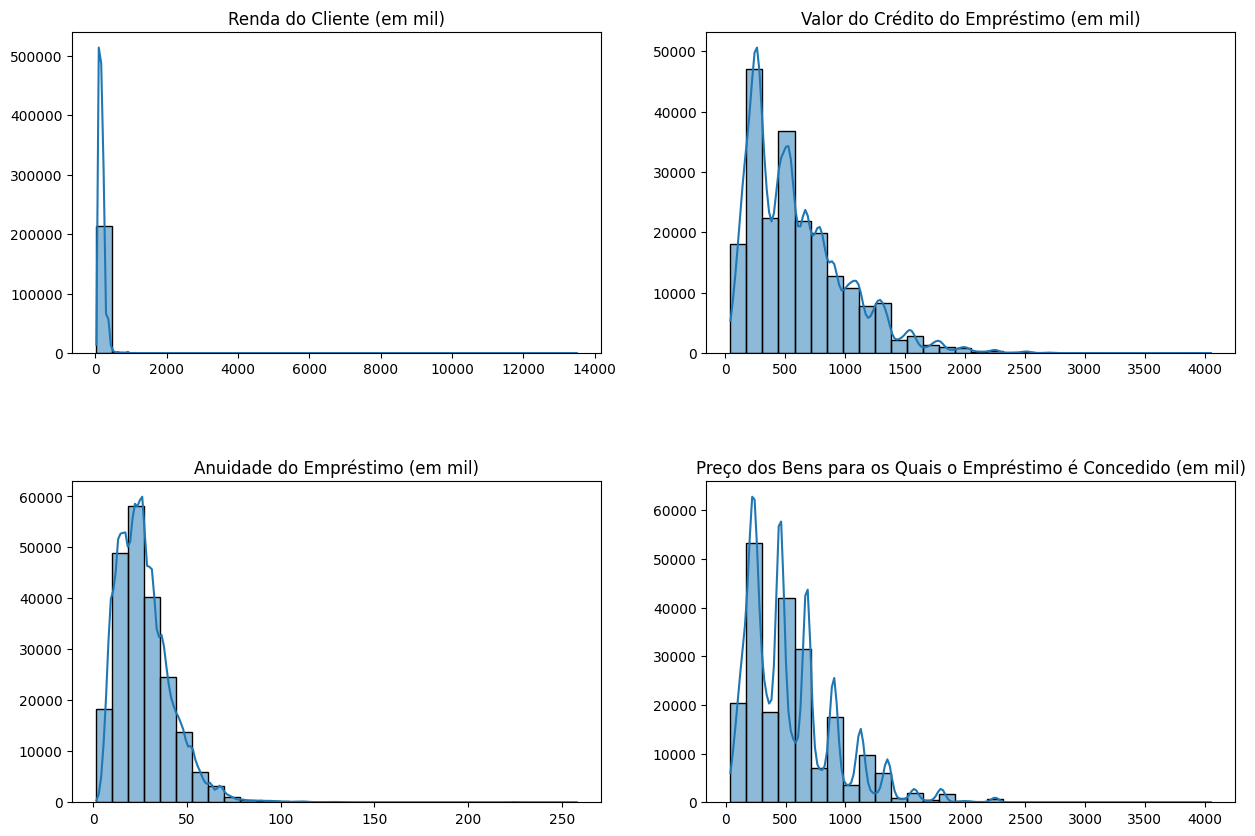

In [186]:
df = abt_00

# Lista das colunas a serem analisadas
colunas = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Configuração do layout dos gráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4)  # Ajusta o espaço vertical entre os gráficos

# Loop sobre as colunas para criar os gráficos
for i, coluna in enumerate(colunas):
    # Configuração do título
    titulo = {
        'AMT_INCOME_TOTAL': 'Renda do Cliente (em mil)',
        'AMT_CREDIT': 'Valor do Crédito do Empréstimo (em mil)',
        'AMT_ANNUITY': 'Anuidade do Empréstimo (em mil)',
        'AMT_GOODS_PRICE': 'Preço dos Bens para os Quais o Empréstimo é Concedido (em mil)'
    }[coluna]

    # Histograma para visualizar a distribuição
    sns.histplot(df[coluna]/1000, kde=True, ax=axs[i // 2, i % 2,], bins=30)
    axs[i // 2, i % 2].set_title(titulo)
    axs[i // 2, i % 2].set_xlabel('')  # Remover o nome do eixo x
    axs[i // 2, i % 2].set_ylabel('')  # Remover o nome do eixo y

# Exibir os gráficos
plt.show()

<br>

## **Relação das Variáveis com o Taget**

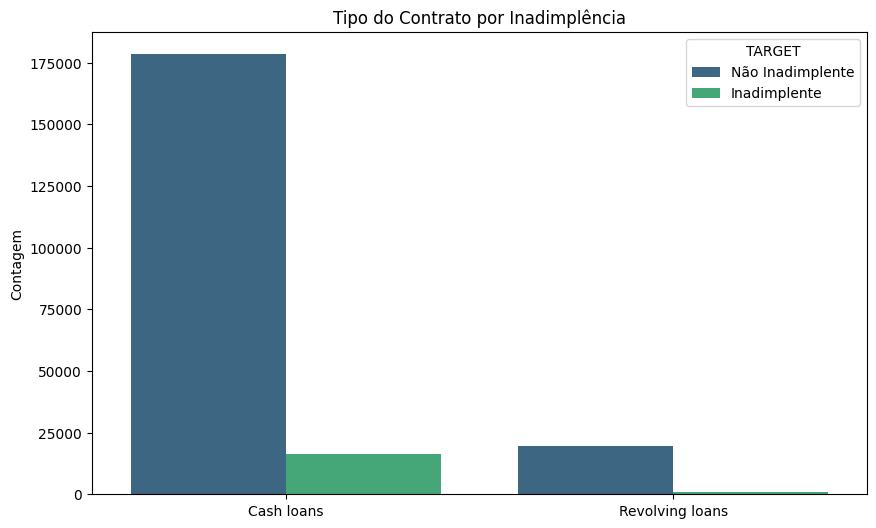

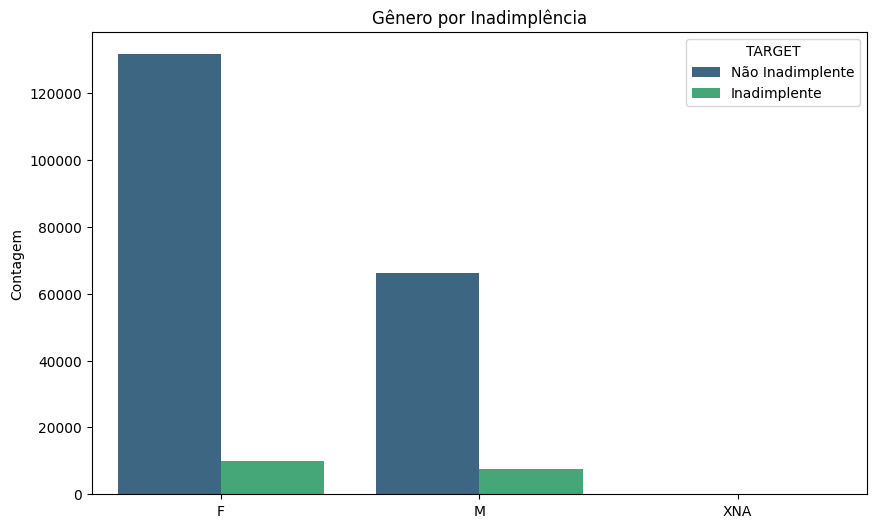

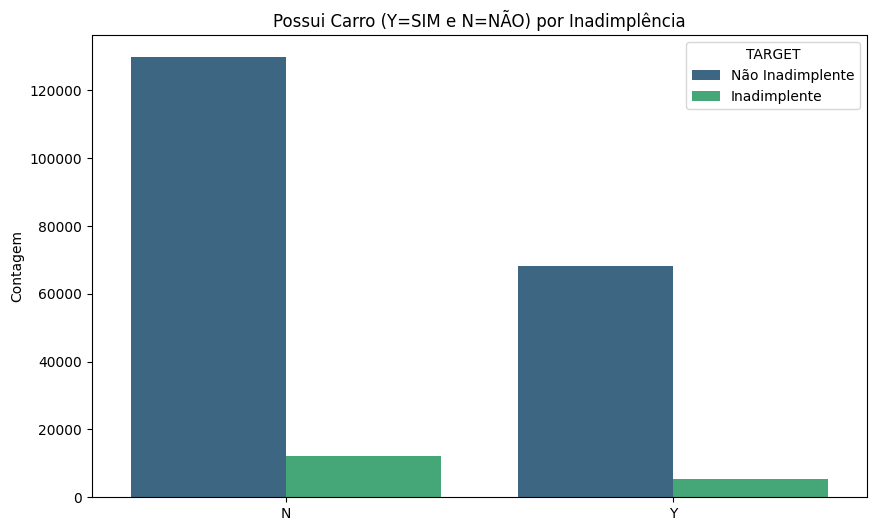

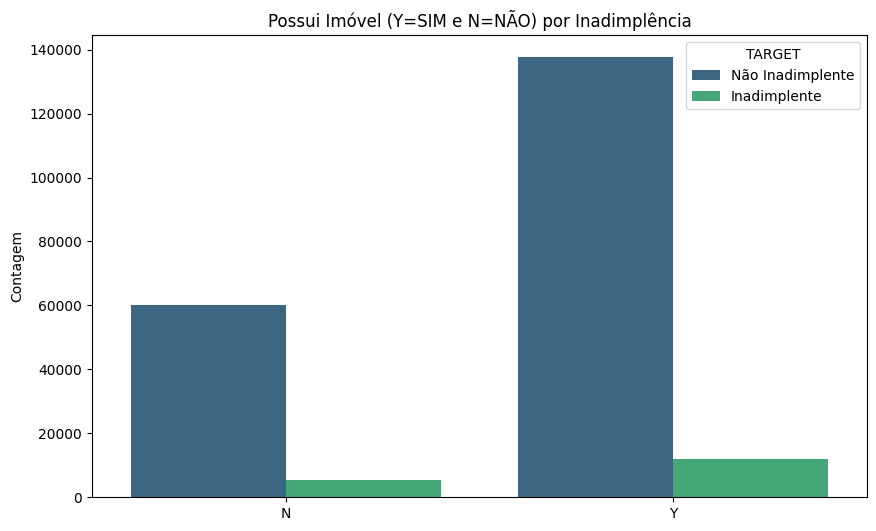

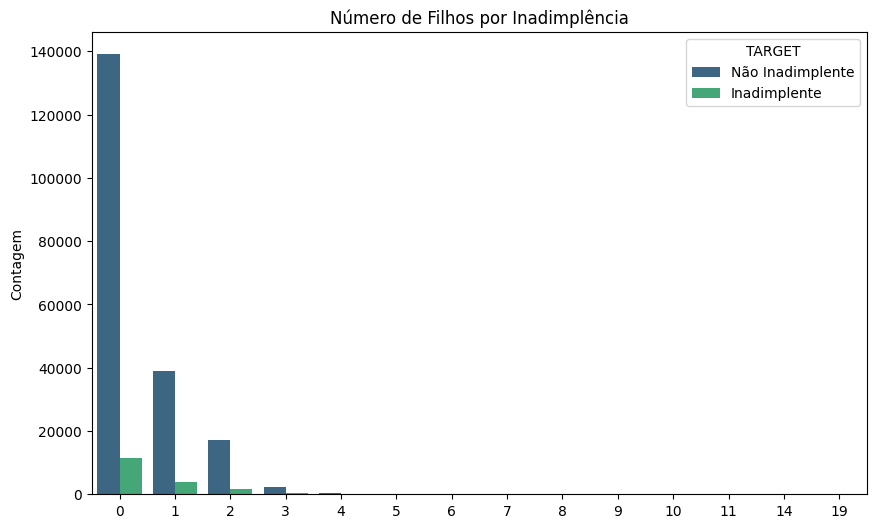

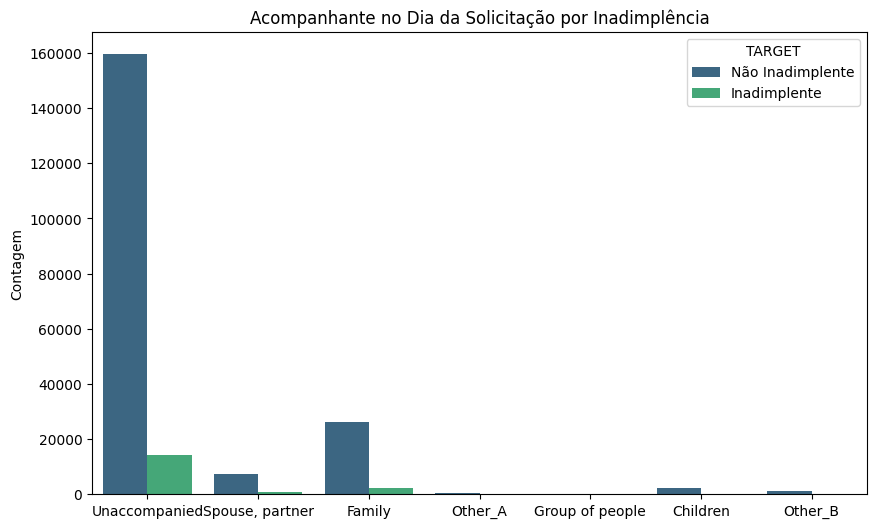

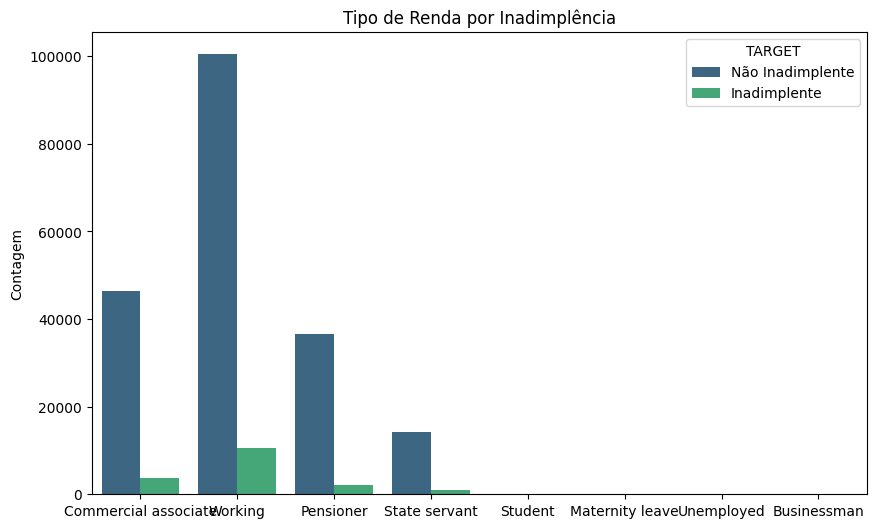

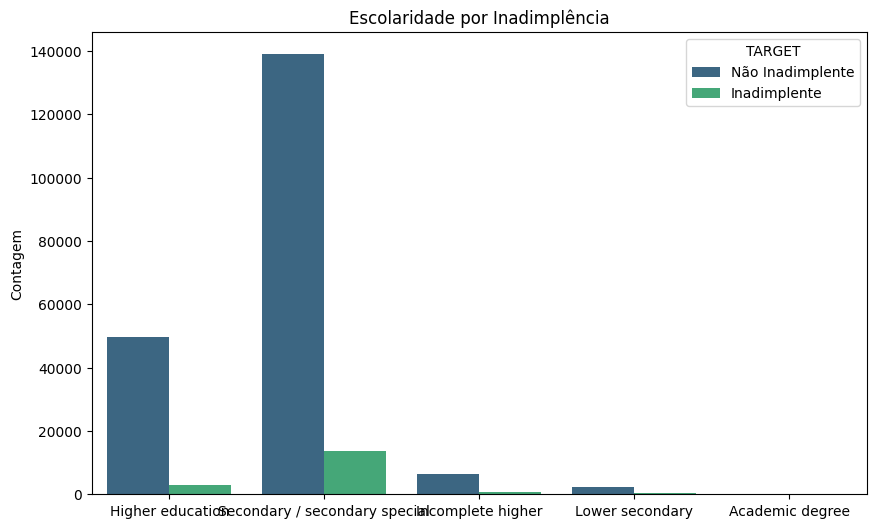

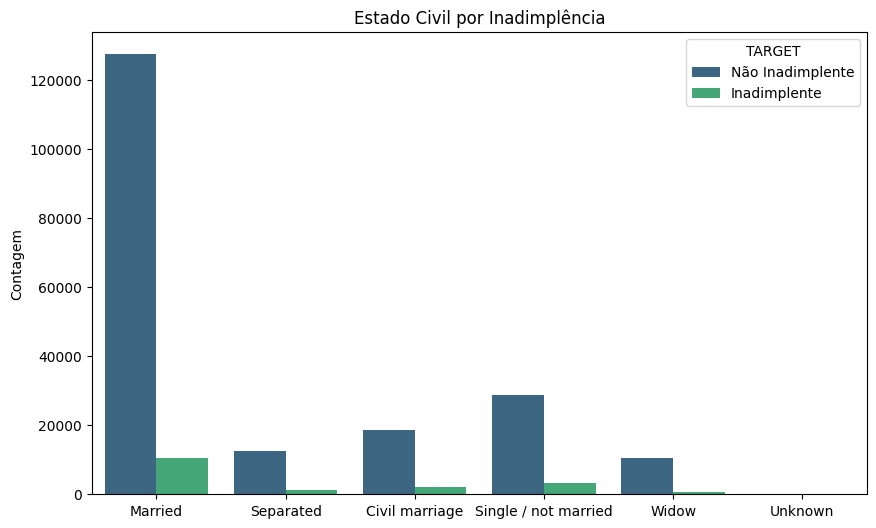

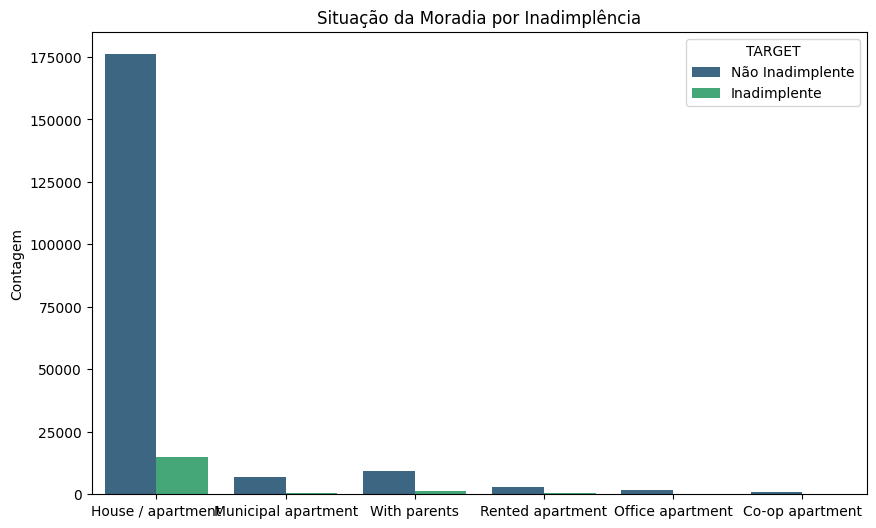

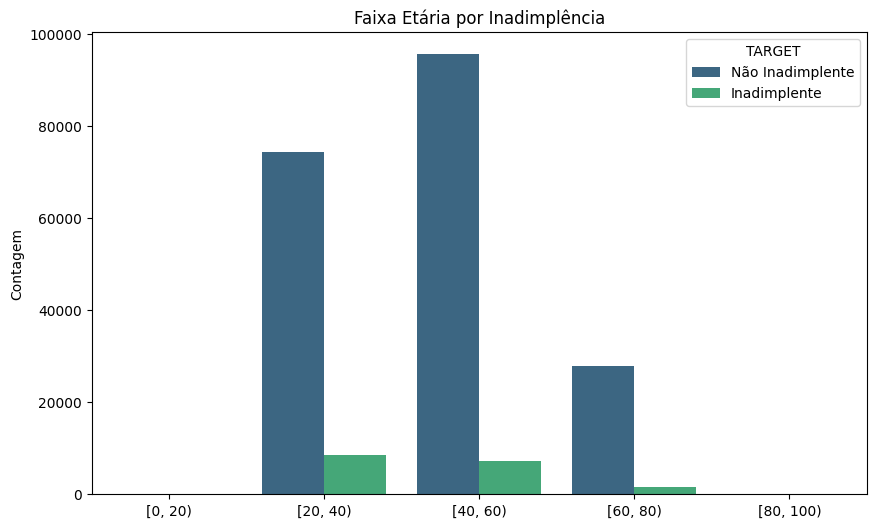

In [187]:
df = abt_00

# Dicionário de tradução de nomes de colunas
column_translation = {
    'NAME_CONTRACT_TYPE': 'Tipo do Contrato',
    'CODE_GENDER': 'Gênero',
    'FLAG_OWN_CAR': 'Possui Carro (Y=SIM e N=NÃO)',
    'FLAG_OWN_REALTY': 'Possui Imóvel (Y=SIM e N=NÃO)',
    'CNT_CHILDREN': 'Número de Filhos',
    'NAME_TYPE_SUITE': 'Acompanhante no Dia da Solicitação',
    'NAME_INCOME_TYPE': 'Tipo de Renda',
    'NAME_EDUCATION_TYPE': 'Escolaridade',
    'NAME_FAMILY_STATUS': 'Estado Civil',
    'NAME_HOUSING_TYPE': 'Situação da Moradia',
    'AGE_GROUP': 'Faixa Etária',
}

# Aplicar a tradução dos nomes das colunas
df_t = df.rename(columns=column_translation)

# Análise de Features Categóricas
categorical_vars = list(column_translation.values())

# Loop sobre as variáveis categóricas e criar os gráficos
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='TARGET', data=df_t, palette='viridis')
    plt.title(f'{var} por Inadimplência')
    plt.xlabel('')
    plt.ylabel('Contagem')
    plt.legend(title='TARGET', loc='upper right', labels=['Não Inadimplente', 'Inadimplente'])
    plt.show()

<br>

**Renda do Cliente vs. Valor do Crédito (colorido pelo TARGET)**

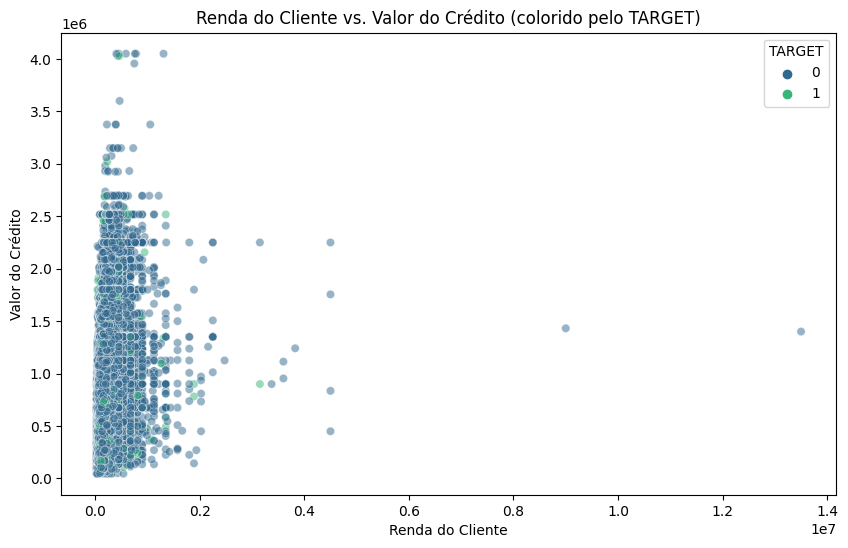

In [188]:
df = abt_00
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', data=df, alpha=0.5, palette='viridis')
plt.title('Renda do Cliente vs. Valor do Crédito (colorido pelo TARGET)')
plt.xlabel('Renda do Cliente')
plt.ylabel('Valor do Crédito')
plt.show()

**Renda do Cliente vs. Anuidade do Empréstimo (colorido pelo TARGET)**

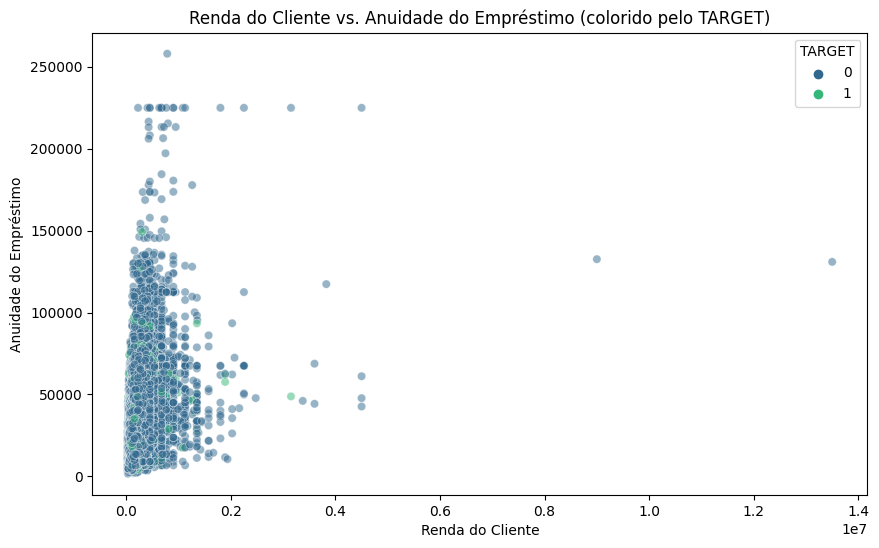

In [189]:
df = abt_00
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_ANNUITY', hue='TARGET', data=df, alpha=0.5, palette='viridis')
plt.title('Renda do Cliente vs. Anuidade do Empréstimo (colorido pelo TARGET)')
plt.xlabel('Renda do Cliente')
plt.ylabel('Anuidade do Empréstimo')
plt.show()

**Renda do Cliente vs. Preço dos Bens (colorido pelo TARGET)**

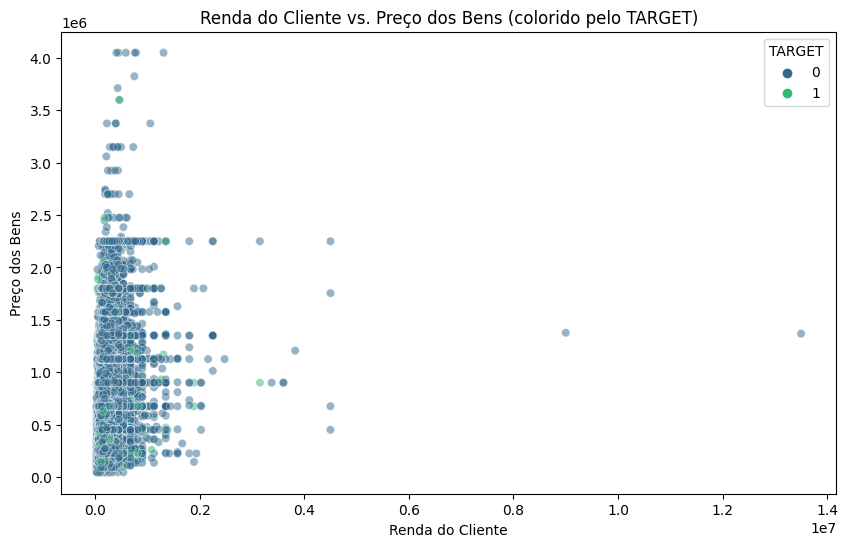

In [190]:
df = abt_00
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_GOODS_PRICE', hue='TARGET', data=df, alpha=0.5, palette='viridis')
plt.title('Renda do Cliente vs. Preço dos Bens (colorido pelo TARGET)')
plt.xlabel('Renda do Cliente')
plt.ylabel('Preço dos Bens')
plt.show()

<br>

## **Relação entre consultas no Credit Bureau e clientes inadimplentes**

**Número de consultas ao Credit Bureau sobre o cliente uma hora antes da aplicação (somente clientes inadimplentes)**

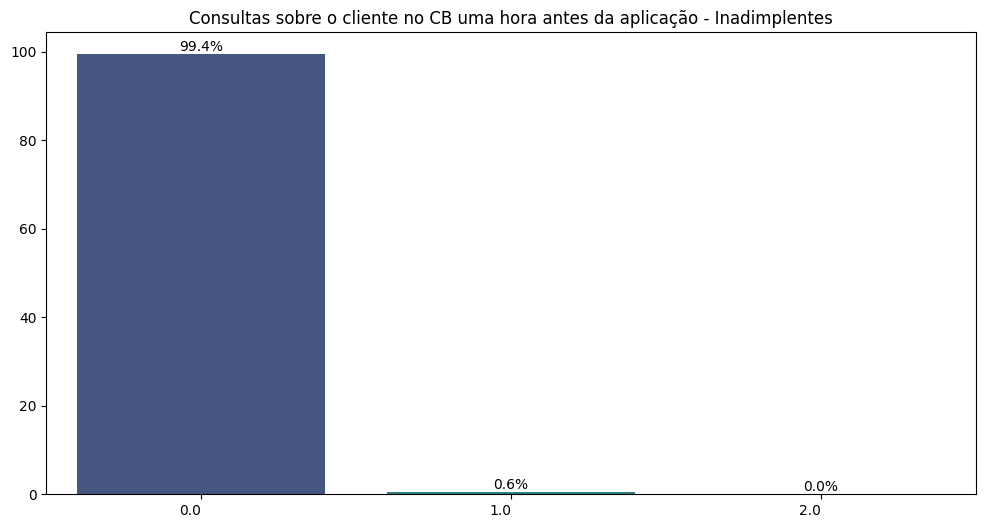

In [191]:
df = abt_00

# Filtrar o DataFrame para incluir apenas clientes inadimplentes
df_inadimplentes = df[df['TARGET'] == 1]

# Calcule a porcentagem de cada categoria na coluna 'AMT_REQ_CREDIT_BUREAU_HOUR'.
percentage_counts = df_inadimplentes['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True) * 100

# Crie um gráfico de barras colorido usando seaborn.
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=percentage_counts.index, y=percentage_counts, palette="viridis")

# Adicione rótulos e título ao gráfico.
plt.xlabel('')
plt.ylabel('')
plt.title('Consultas sobre o cliente no CB uma hora antes da aplicação - Inadimplentes')

# Adicione a porcentagem no topo das colunas.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%',
            ha='center', va='bottom')

# Rotacione os rótulos do eixo x em 45 graus.
plt.xticks(ha='right')

# Mostre o gráfico.
plt.show()

**Número de consultas ao Credit Bureau sobre o cliente um dia antes da aplicação (somente clientes inadimplentes)**

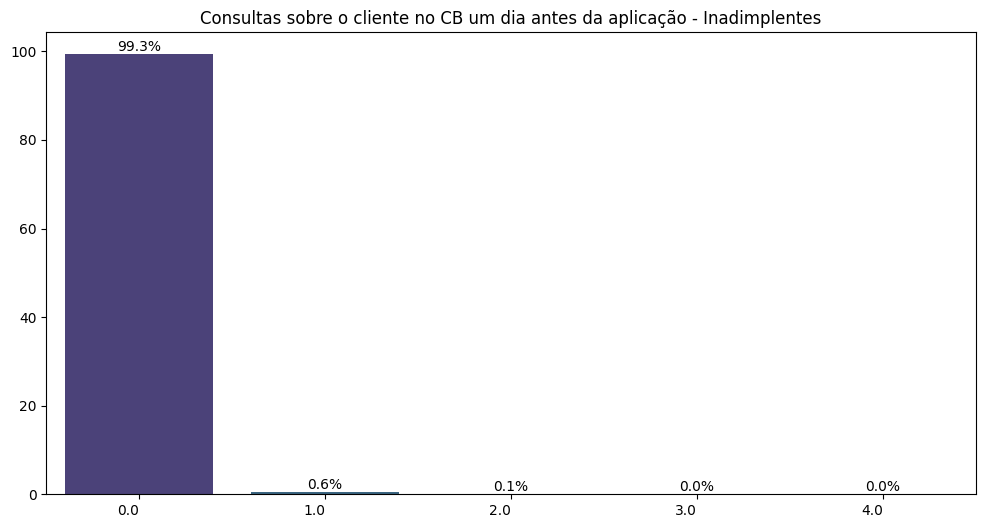

In [192]:
df = abt_00

# Filtrar o DataFrame para incluir apenas clientes inadimplentes
df_inadimplentes = df[df['TARGET'] == 1]

# Calcule a porcentagem de cada categoria na coluna 'AMT_REQ_CREDIT_BUREAU_DAY'.
percentage_counts = df_inadimplentes['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True) * 100

# Crie um gráfico de barras colorido usando seaborn.
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=percentage_counts.index, y=percentage_counts, palette="viridis")

# Adicione rótulos e título ao gráfico.
plt.xlabel('')
plt.ylabel('')
plt.title('Consultas sobre o cliente no CB um dia antes da aplicação - Inadimplentes')

# Adicione a porcentagem no topo das colunas.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%',
            ha='center', va='bottom')

# Rotacione os rótulos do eixo x em 45 graus.
plt.xticks(ha='right')

# Mostre o gráfico.
plt.show()

**Número de consultas ao Credit Bureau sobre o cliente uma semana antes da aplicação (somente clientes inadimplentes)**

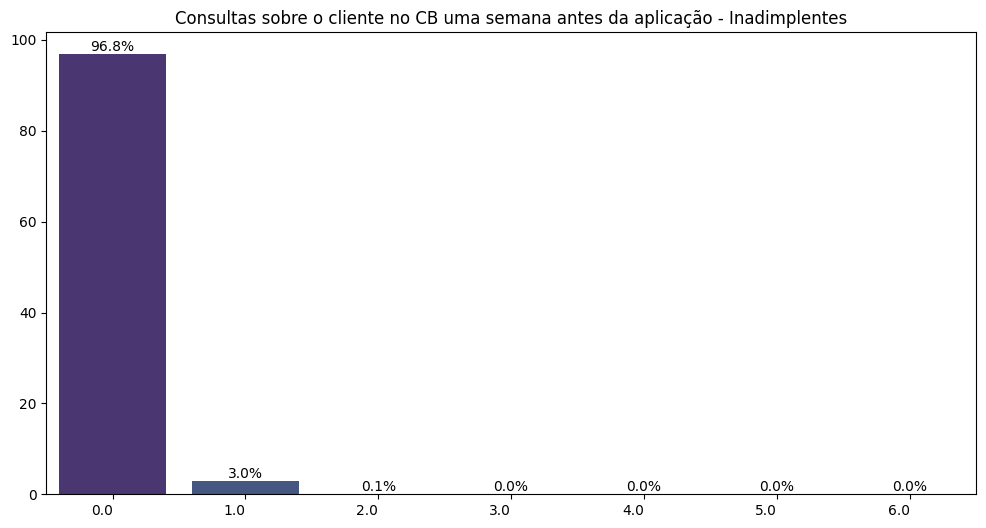

In [193]:
df = abt_00

# Filtrar o DataFrame para incluir apenas clientes inadimplentes
df_inadimplentes = df[df['TARGET'] == 1]

# Calcule a porcentagem de cada categoria na coluna 'AMT_REQ_CREDIT_BUREAU_WEEK'.
percentage_counts = df_inadimplentes['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True) * 100

# Crie um gráfico de barras colorido usando seaborn.
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=percentage_counts.index, y=percentage_counts, palette="viridis")

# Adicione rótulos e título ao gráfico.
plt.xlabel('')
plt.ylabel('')
plt.title('Consultas sobre o cliente no CB uma semana antes da aplicação - Inadimplentes')

# Adicione a porcentagem no topo das colunas.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%',
            ha='center', va='bottom')

# Rotacione os rótulos do eixo x em 45 graus.
plt.xticks(ha='right')

# Mostre o gráfico.
plt.show()

**Número de consultas ao Credit Bureau sobre o cliente um mês antes da aplicação (somente clientes inadimplentes)**

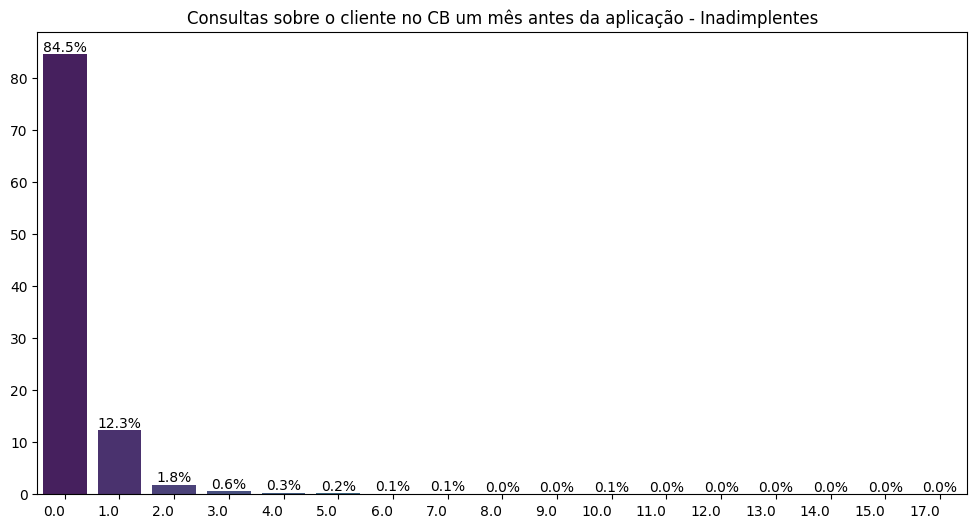

In [194]:
df = abt_00

# Filtrar o DataFrame para incluir apenas clientes inadimplentes
df_inadimplentes = df[df['TARGET'] == 1]

# Calcule a porcentagem de cada categoria na coluna 'AMT_REQ_CREDIT_BUREAU_MON'.
percentage_counts = df_inadimplentes['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True) * 100

# Crie um gráfico de barras colorido usando seaborn.
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=percentage_counts.index, y=percentage_counts, palette="viridis")

# Adicione rótulos e título ao gráfico.
plt.xlabel('')
plt.ylabel('')
plt.title('Consultas sobre o cliente no CB um mês antes da aplicação - Inadimplentes')

# Adicione a porcentagem no topo das colunas.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%',
            ha='center', va='bottom')

# Rotacione os rótulos do eixo x em 45 graus.
plt.xticks(ha='right')

# Mostre o gráfico.
plt.show()

**Número de consultas ao Credit Bureau sobre o cliente um trimestre antes da aplicação (somente clientes inadimplentes)**

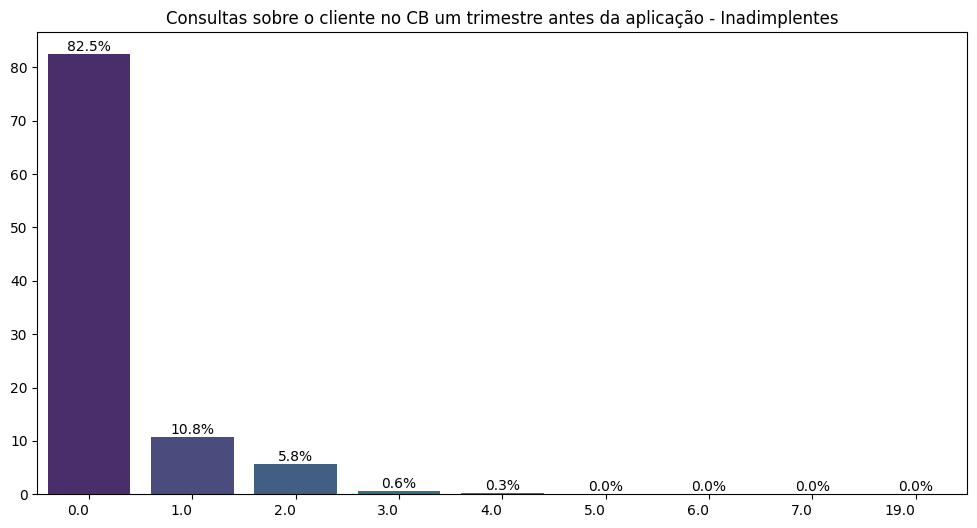

In [195]:
df = abt_00

# Filtrar o DataFrame para incluir apenas clientes inadimplentes
df_inadimplentes = df[df['TARGET'] == 1]

# Calcule a porcentagem de cada categoria na coluna 'AMT_REQ_CREDIT_BUREAU_QRT'.
percentage_counts = df_inadimplentes['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True) * 100

# Crie um gráfico de barras colorido usando seaborn.
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=percentage_counts.index, y=percentage_counts, palette="viridis")

# Adicione rótulos e título ao gráfico.
plt.xlabel('')
plt.ylabel('')
plt.title('Consultas sobre o cliente no CB um trimestre antes da aplicação - Inadimplentes')

# Adicione a porcentagem no topo das colunas.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%',
            ha='center', va='bottom')

# Rotacione os rótulos do eixo x em 45 graus.
plt.xticks(ha='right')

# Mostre o gráfico.
plt.show()

**Número de consultas ao Credit Bureau sobre o cliente um ano antes da aplicação (somente clientes inadimplentes)**

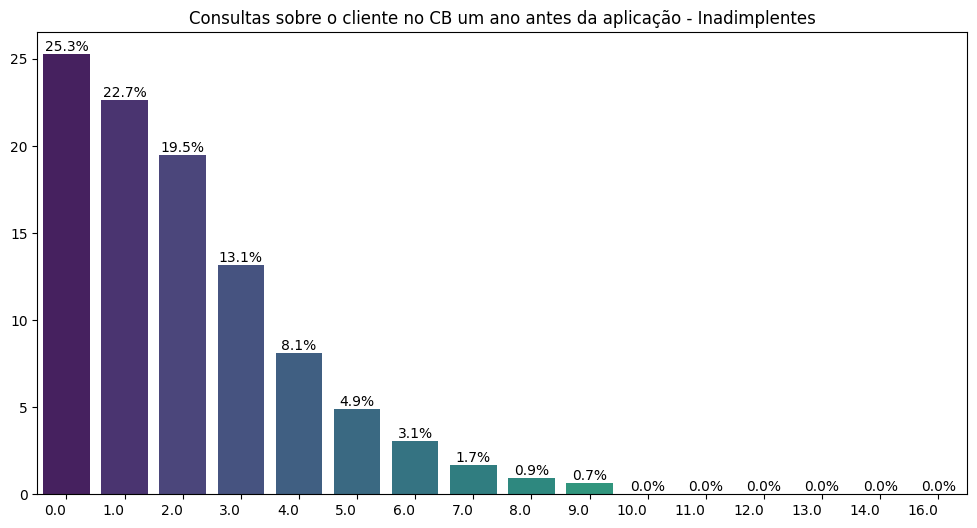

In [196]:
df = abt_00

# Filtrar o DataFrame para incluir apenas clientes inadimplentes
df_inadimplentes = df[df['TARGET'] == 1]

# Calcule a porcentagem de cada categoria na coluna 'AMT_REQ_CREDIT_BUREAU_YEAR'.
percentage_counts = df_inadimplentes['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True) * 100

# Crie um gráfico de barras colorido usando seaborn.
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=percentage_counts.index, y=percentage_counts, palette="viridis")

# Adicione rótulos e título ao gráfico.
plt.xlabel('')
plt.ylabel('')
plt.title('Consultas sobre o cliente no CB um ano antes da aplicação - Inadimplentes')

# Adicione a porcentagem no topo das colunas.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%',
            ha='center', va='bottom')

plt.xticks(ha='right')

# Mostre o gráfico.
plt.show()